https://drive.google.com/file/d/1L39Mf8leWkQ-pFERyfZUloZyFVTW54M7/view?usp=sharing

https://www.kaggle.com/datasets/shubh0799/churn-modelling?resource=download


In [1]:
! gdown --id 1L39Mf8leWkQ-pFERyfZUloZyFVTW54M7

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1L39Mf8leWkQ-pFERyfZUloZyFVTW54M7
To: /content/churn_modelling.zip
100% 268k/268k [00:00<00:00, 3.16MB/s]


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/churn_modelling.zip')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Анализ данных

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.isna().mean()

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [7]:
df['Exited']

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

**Обучающая и тестовая выборка**

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train, test = train_test_split(df, train_size=0.6, random_state=42, stratify=df['Exited'])

In [10]:
val, test = train_test_split(test, train_size=0.5, random_state=42, stratify=test['Exited'])

In [11]:
train['Exited'].mean()

0.20366666666666666

In [12]:
val['Exited'].mean()

0.204

Phik

In [13]:
train_full = pd.concat([train, val])

In [14]:
! pip install phik

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 11.1 MB/s eta 0:00:00


In [15]:
import phik

In [16]:
phik_overview = train_full.phik_matrix()

interval columns not set, guessing: ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable Surname is large: 2591. Are you sure this is not an interval variable? Analysis for pairs of variables including Surname can be slow.
  warnings.warn(


In [17]:
phik_overview['Exited'].sort_values(ascending=False)

Exited             1.000000
NumOfProducts      0.564969
Age                0.498768
IsActiveMember     0.237244
Balance            0.167823
Gender             0.165231
CreditScore        0.105371
Geography          0.104047
CustomerId         0.035477
Tenure             0.030333
RowNumber          0.000000
Surname            0.000000
HasCrCard          0.000000
EstimatedSalary    0.000000
Name: Exited, dtype: float64

Человеческое обучение

In [18]:
train_full.groupby('NumOfProducts')['Exited'].agg(['mean','count'])

,mean,count
NumOfProducts,,
1,0.275369,4060
2,0.077049,3673
3,0.826484,219
4,1.000000,48


In [19]:
model = train_full.groupby('NumOfProducts')['Exited'].mean().reset_index()

In [20]:
model = model.rename({'Exited':'score_prod'}, axis=1)

In [21]:
train_full = train_full.merge(model, how='left', on='NumOfProducts')

Baseline

In [22]:
train_full['score_mean'] = train_full['Exited'].mean()

In [23]:
train_full

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,score_mean
0,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0,0.077049,0.20375
1,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0,0.077049,0.20375
2,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0,0.077049,0.20375
3,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0,0.275369,0.20375
4,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0,0.077049,0.20375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,927,15628303,Thurgood,738,Spain,Male,35,3,0.00,1,1,1,15650.73,0,0.275369,0.20375
7996,6728,15610416,Christie,745,France,Female,36,9,0.00,1,1,0,19605.18,1,0.275369,0.20375
7997,4746,15655410,Hinton,768,Germany,Male,49,1,133384.66,1,1,0,102397.22,1,0.275369,0.20375
7998,1308,15638806,Blackburn,645,Spain,Male,49,2,0.00,2,0,0,10023.15,0,0.077049,0.20375


In [24]:
from sklearn.metrics import log_loss

In [25]:
log_loss(train_full['Exited'], train_full['score_mean'])

0.5055572860042145

In [26]:
log_loss(train_full['Exited'], train_full['score_prod'])

0.4359616823203511

Uplift

In [27]:
train_full

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,score_mean
0,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0,0.077049,0.20375
1,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0,0.077049,0.20375
2,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0,0.077049,0.20375
3,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0,0.275369,0.20375
4,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0,0.077049,0.20375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,927,15628303,Thurgood,738,Spain,Male,35,3,0.00,1,1,1,15650.73,0,0.275369,0.20375
7996,6728,15610416,Christie,745,France,Female,36,9,0.00,1,1,0,19605.18,1,0.275369,0.20375
7997,4746,15655410,Hinton,768,Germany,Male,49,1,133384.66,1,1,0,102397.22,1,0.275369,0.20375
7998,1308,15638806,Blackburn,645,Spain,Male,49,2,0.00,2,0,0,10023.15,0,0.077049,0.20375


In [28]:
train_full['Exited'].sample(frac=0.2, random_state=42).mean()

0.210625

In [29]:
exited_all = train_full['Exited'].sum()

In [30]:
train_full['Exited'].sample(frac=0.2, random_state=42).sum()

337

In [31]:
train_full['Exited'].sample(frac=0.2, random_state=42).sum() / exited_all

0.2067484662576687

In [32]:
train_full = train_full.sort_values('score_prod', ascending=False)

In [33]:
train_full.head(round(len(train_full) * 0.2))['Exited'].sum()

583

In [34]:
train_full.head(round(len(train_full) * 0.2))['Exited'].sum() / exited_all

0.3576687116564417

In [35]:
0.3576687116564417 /0.2067484662576687

1.7299703264094954

uplift - 1.7299703264094954 (превосхожу во столько раз)

Добавим шум

In [36]:
import numpy as np

In [37]:
np.random.seed(42)
np.random.uniform(0, 0.001, size=len(train_full))

array([0.00037454, 0.00095071, 0.00073199, ..., 0.00045533, 0.00090844,
       0.00010448])

In [38]:
np.random.seed(42)
train_full['score_prod'] = train_full['score_prod'] - np.random.uniform(0, 0.001, size=len(train_full))

In [39]:
train_full['score_prod'].nunique()

8000

Uplift func

In [40]:
exited_all = train_full['Exited'].sum()

In [41]:
train_full = train_full.sort_values('score_prod', ascending=False)

In [42]:
train_full.head(round(len(train_full) * 0.2))['Exited'].sum()

622

In [43]:
train_full.head(round(len(train_full) * 0.2))['Exited'].sum() / exited_all

0.3815950920245399

In [44]:
0.3815950920245399 / 0.2

1.9079754601226995

In [45]:
def uplift(df, score, pct):
  exited_all = df['Exited'].sum()
  df = df.sort_values(score, ascending=False)
  exited_found = df.head(round(len(df) * pct))['Exited'].sum()

  return exited_found / exited_all / pct

In [46]:
uplift(train_full, 'score_prod', 0.2)

1.9079754601226995

In [47]:
test = test.merge(model, on='NumOfProducts', how='left' )

In [48]:
np.random.seed(42)
test['score_prod'] = test['score_prod'] - np.random.uniform(0, 0.001, size=len(test))

In [49]:
log_loss(train_full['Exited'], train_full['score_prod'])

0.4359717821616623

In [50]:
log_loss(test['Exited'], test['score_prod'])

0.4338658337619006

In [51]:
uplift(test, 'score_prod', 0.2)

1.8427518427518426

In [52]:
import matplotlib.pyplot as plt


plt.style.use('dark_background')

<Axes: >

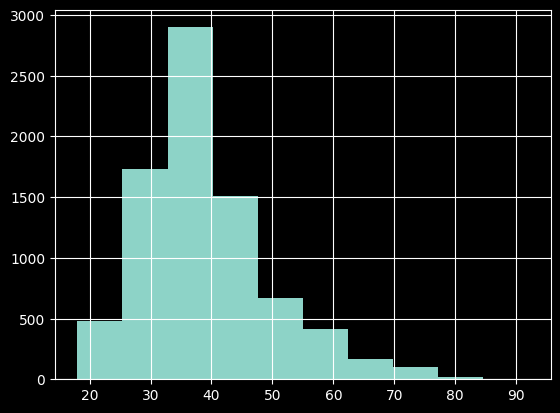

In [53]:
train_full['Age'].hist()

In [54]:
train_full['age_group'] = pd.cut(train_full['Age'], [0, 31, 35, 40, 46, float('inf')])

In [55]:
train_full.groupby('age_group')['Exited'].agg(['count', 'mean'])

,count,mean
age_group,,
"(0.0, 31.0]",1896,0.075422
"(31.0, 35.0]",1424,0.091994
"(35.0, 40.0]",1797,0.146912
"(40.0, 46.0]",1376,0.289971
"(46.0, inf]",1507,0.459854


In [56]:
model = train_full.groupby(['NumOfProducts', 'age_group'])['Exited'].mean().reset_index()

In [57]:
model = model.rename({'Exited':'score_prod_age'}, axis=1)

In [58]:
model

,NumOfProducts,age_group,score_prod_age
0,1,"(0.0, 31.0]",0.106774
1,1,"(31.0, 35.0]",0.135908
2,1,"(35.0, 40.0]",0.198646
3,1,"(40.0, 46.0]",0.378873
4,1,"(46.0, inf]",0.542506
5,2,"(0.0, 31.0]",0.029293
6,2,"(31.0, 35.0]",0.031206
7,2,"(35.0, 40.0]",0.059977
8,2,"(40.0, 46.0]",0.106239
9,2,"(46.0, inf]",0.225869


In [59]:
train_full = train_full.merge(model, how='left', on=['NumOfProducts', 'age_group'])

In [60]:
train_full

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,score_mean,age_group,score_prod_age
0,4512,15568006,Ukaegbunam,634,France,Female,45,2,0.00,4,1,0,101039.53,1,0.999979,0.20375,"(40.0, 46.0]",1.000000
1,4655,15593976,Swanson,578,Germany,Female,31,5,102088.68,4,0,0,187866.21,1,0.999966,0.20375,"(0.0, 31.0]",1.000000
2,4404,15616859,Bonwick,602,Germany,Female,43,2,113641.49,4,1,0,115116.35,1,0.999954,0.20375,"(40.0, 46.0]",1.000000
3,9412,15796115,Forbes,689,Germany,Female,40,4,78119.59,4,1,0,119259.34,1,0.999942,0.20375,"(35.0, 40.0]",1.000000
4,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,0.999935,0.20375,"(0.0, 31.0]",1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,9749,15680201,Marcelo,627,Germany,Male,24,5,102773.20,2,1,0,56793.02,1,0.076050,0.20375,"(0.0, 31.0]",0.029293
7996,3350,15603465,Dunn,665,Germany,Female,45,5,155447.65,2,1,0,51871.95,1,0.076050,0.20375,"(40.0, 46.0]",0.106239
7997,7652,15776921,Geoghegan,431,Germany,Male,45,5,83624.55,2,0,0,36899.62,0,0.076050,0.20375,"(40.0, 46.0]",0.106239
7998,7453,15636562,Muravyova,573,Spain,Male,44,8,0.00,2,0,0,62424.46,0,0.076049,0.20375,"(40.0, 46.0]",0.106239


In [61]:
log_loss(train_full['Exited'], train_full['score_prod'])

0.4359717821616623

In [62]:
uplift(train_full, 'score_prod', 0.2)

1.9079754601226995

In [63]:
log_loss(train_full['Exited'], train_full['score_prod_age'])

0.3866695862492173

In [64]:
uplift(train_full, 'score_prod_age', 0.2)

2.702453987730061

In [65]:
test['age_group'] = pd.cut(test['Age'], [0, 31, 35, 40, 46, float('inf')])

In [66]:
test = test.merge(model, how='left', on=['NumOfProducts', 'age_group'])

In [67]:
log_loss(test['Exited'], test['score_prod'])

0.4338658337619006

In [68]:
uplift(test, 'score_prod', 0.2)

1.8427518427518426

In [69]:
log_loss(test['Exited'], test['score_prod_age'])

0.3870707514157596

In [70]:
uplift(test, 'score_prod_age', 0.2)

2.7518427518427515

In [71]:
train_full['IsActiveMember'].value_counts()

1    4131
0    3869
Name: IsActiveMember, dtype: int64

In [72]:
train_full.groupby('IsActiveMember')['Exited'].agg(['count','mean'])

,count,mean
IsActiveMember,,
0,3869,0.267511
1,4131,0.144033


In [73]:
model = train_full.groupby(['NumOfProducts', 'age_group', 'IsActiveMember'])['Exited'].mean().reset_index()

In [74]:
model = model.rename({'Exited':'score_prod_age_active'}, axis=1)

In [75]:
model

,NumOfProducts,age_group,IsActiveMember,score_prod_age_active
0,1,"(0.0, 31.0]",0,0.143885
1,1,"(0.0, 31.0]",1,0.072687
2,1,"(31.0, 35.0]",0,0.177650
3,1,"(31.0, 35.0]",1,0.094286
4,1,"(35.0, 40.0]",0,0.223714
5,1,"(35.0, 40.0]",1,0.173121
6,1,"(40.0, 46.0]",0,0.466146
7,1,"(40.0, 46.0]",1,0.276074
8,1,"(46.0, inf]",0,0.793103
9,1,"(46.0, inf]",1,0.334016


In [76]:
train_full = train_full.merge(model, how='left', on=['NumOfProducts', 'age_group', 'IsActiveMember'])

In [77]:
test = test.merge(model, how='left', on=['NumOfProducts', 'age_group', 'IsActiveMember'])

In [79]:
test = test.rename({'score_prod_age_active_y': 'score_prod_age_active'}, axis=1)

In [80]:
def print_metrics(df, score):
  print(log_loss(df['Exited'], df[score]))
  print(uplift(df, score, 0.2))

In [81]:
print_metrics(train_full, 'score_prod_age')

0.3866695862492173
2.702453987730061


In [82]:
print_metrics(test, 'score_prod_age')

0.3870707514157596
2.7518427518427515


In [83]:
print_metrics(train_full, 'score_prod_age_active')

0.3655019751451003
2.861963190184049


In [84]:
print_metrics(test, 'score_prod_age_active')

0.3638472889481342
2.862407862407862


# Машинное обучегни

In [85]:
! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.3 MB/s eta 0:00:00


In [86]:
from catboost import CatBoostClassifier

In [87]:
train_full.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'score_prod',
       'score_mean', 'age_group', 'score_prod_age', 'score_prod_age_active'],
      dtype='object')

In [88]:
X = ['NumOfProducts', 'Age', 'IsActiveMember']
y = ['Exited']

In [89]:
params = {'verbose':100,
          'random_seed': 42,
          'learning_rate':0.01}

In [90]:
model = CatBoostClassifier(**params)

In [91]:
model.fit(train[X], train[y], eval_set=(val[X], val[y]))

0:	learn: 0.6849803	test: 0.6849389	best: 0.6849389 (0)	total: 48.5ms	remaining: 48.5s
100:	learn: 0.3991169	test: 0.3930537	best: 0.3930537 (100)	total: 233ms	remaining: 2.07s
200:	learn: 0.3659581	test: 0.3563817	best: 0.3563817 (200)	total: 422ms	remaining: 1.68s
300:	learn: 0.3589224	test: 0.3476566	best: 0.3476566 (300)	total: 603ms	remaining: 1.4s
400:	learn: 0.3565171	test: 0.3446648	best: 0.3446648 (400)	total: 796ms	remaining: 1.19s
500:	learn: 0.3553274	test: 0.3433005	best: 0.3432984 (498)	total: 974ms	remaining: 970ms
600:	learn: 0.3544987	test: 0.3425379	best: 0.3425379 (600)	total: 1.17s	remaining: 775ms
700:	learn: 0.3539638	test: 0.3421168	best: 0.3421135 (699)	total: 1.34s	remaining: 572ms
800:	learn: 0.3532817	test: 0.3419139	best: 0.3419139 (800)	total: 1.51s	remaining: 377ms
900:	learn: 0.3524351	test: 0.3416923	best: 0.3416923 (900)	total: 1.69s	remaining: 186ms
999:	learn: 0.3513546	test: 0.3417688	best: 0.3416551 (927)	total: 1.89s	remaining: 0us

bestTest = 0.34

In [92]:
test['score_cat_prod_age_active'] = model.predict_proba(test[X])[:,1]

In [93]:
test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,age_group,score_prod_age,score_prod_age_active,score_cat_prod_age_active
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,1,0,29818.20,0,0.274995,"(0.0, 31.0]",0.106774,0.143885,0.127267
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,0,0,187740.04,0,0.274419,"(31.0, 35.0]",0.135908,0.177650,0.160071
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,0,0,19658.43,0,0.274637,"(35.0, 40.0]",0.198646,0.223714,0.235787
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,1,0,121982.73,0,0.274771,"(31.0, 35.0]",0.135908,0.177650,0.160071
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,1,1,115767.93,0,0.275213,"(31.0, 35.0]",0.135908,0.094286,0.102859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7393,15795079,Nnaife,596,Spain,Male,67,6,0.00,2,1,1,138350.74,0,0.076392,"(46.0, inf]",0.225869,0.134048,0.052185
1996,3234,15601550,Genovesi,595,Spain,Male,36,6,85768.42,1,1,1,24802.77,0,0.274413,"(35.0, 40.0]",0.198646,0.173121,0.127713
1997,219,15659366,Shih,807,France,Male,43,1,105799.32,2,1,0,34888.04,1,0.076980,"(40.0, 46.0]",0.106239,0.144262,0.147568
1998,4756,15740072,Padovesi,720,France,Female,37,2,120328.88,2,1,1,138470.21,0,0.076992,"(35.0, 40.0]",0.059977,0.042353,0.039976


In [94]:
print_metrics(test,'score_prod_age_active')

0.3638472889481342
2.862407862407862


In [95]:
print_metrics(test,'score_cat_prod_age_active')

0.35878132799643003
2.899262899262899


# обучение на всех фичах

In [96]:
train.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [97]:
X = ['CustomerId', 'CreditScore', 'Geography', 'Gender', 
     'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']
cat_features = ['Geography', 'Gender']
y = ['Exited']

In [98]:
from catboost import Pool

train_data = Pool(data=train[X],
                  label=train[y],
                  cat_features=cat_features
                 )

valid_data = Pool(data=val[X],
                  label=val[y],
                  cat_features=cat_features
                 )

In [99]:
params = {'verbose':100,
          'random_seed': 42,
          'learning_rate':0.01}

In [100]:
model = CatBoostClassifier(**params)

In [101]:
model.fit(train_data, eval_set=valid_data)

0:	learn: 0.6848575	test: 0.6849145	best: 0.6849145 (0)	total: 13.1ms	remaining: 13.1s
100:	learn: 0.3908412	test: 0.3894043	best: 0.3894043 (100)	total: 848ms	remaining: 7.54s
200:	learn: 0.3457312	test: 0.3445503	best: 0.3445503 (200)	total: 2.38s	remaining: 9.45s
300:	learn: 0.3288071	test: 0.3307084	best: 0.3307084 (300)	total: 3.83s	remaining: 8.9s
400:	learn: 0.3192987	test: 0.3252459	best: 0.3252459 (400)	total: 4.57s	remaining: 6.82s
500:	learn: 0.3120470	test: 0.3221057	best: 0.3221057 (500)	total: 5.31s	remaining: 5.29s
600:	learn: 0.3054735	test: 0.3204300	best: 0.3204300 (600)	total: 6.05s	remaining: 4.02s
700:	learn: 0.2997053	test: 0.3192377	best: 0.3192377 (700)	total: 6.81s	remaining: 2.9s
800:	learn: 0.2946934	test: 0.3188206	best: 0.3187917 (794)	total: 7.54s	remaining: 1.87s
900:	learn: 0.2890177	test: 0.3185731	best: 0.3185731 (900)	total: 8.55s	remaining: 939ms
999:	learn: 0.2831978	test: 0.3186396	best: 0.3185004 (978)	total: 9.3s	remaining: 0us

bestTest = 0.3185

In [102]:
test['score_cat_prod_age_active_all_features'] = model.predict_proba(test[X])[:,1]

In [103]:
print_metrics(test, 'score_cat_prod_age_active')

0.35878132799643003
2.899262899262899


In [104]:
print_metrics(test, 'score_cat_prod_age_active_all_features')

0.3296082204006806
3.1449631449631448


In [105]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,NumOfProducts,27.408724
1,Age,21.567747
2,Balance,11.455919
3,Geography,10.011145
4,IsActiveMember,7.420335
5,EstimatedSalary,5.163513
6,CustomerId,4.965796
7,CreditScore,4.482999
8,Tenure,3.637201
9,Gender,3.089379


In [106]:
phik_overview['Exited'].sort_values(ascending=False)

Exited             1.000000
NumOfProducts      0.564969
Age                0.498768
IsActiveMember     0.237244
Balance            0.167823
Gender             0.165231
CreditScore        0.105371
Geography          0.104047
CustomerId         0.035477
Tenure             0.030333
RowNumber          0.000000
Surname            0.000000
HasCrCard          0.000000
EstimatedSalary    0.000000
Name: Exited, dtype: float64

Shap

In [107]:
! pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 13.3 MB/s eta 0:00:00


In [108]:
import shap
shap.initjs()

In [109]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test[X])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


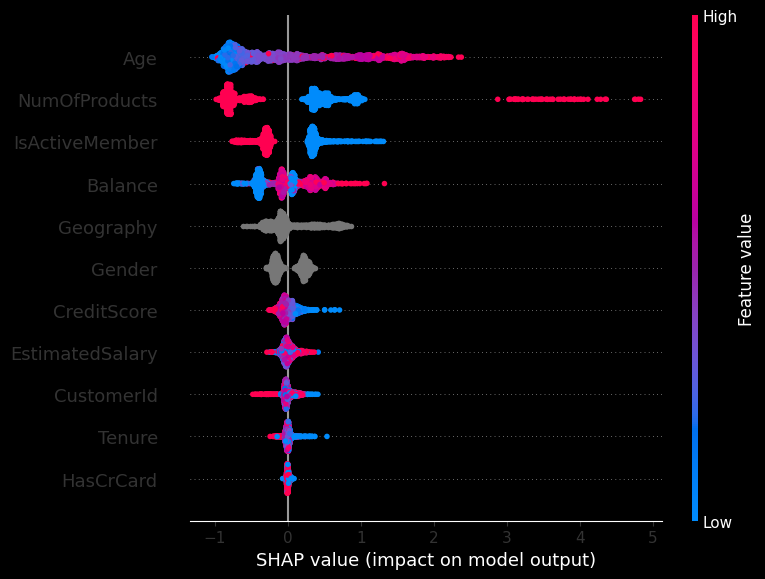

In [110]:
shap.summary_plot(shap_values, test[X])

In [111]:
train_full.groupby('NumOfProducts')['Exited'].agg(['count', 'mean'])

,count,mean
NumOfProducts,,
1,4060,0.275369
2,3673,0.077049
3,219,0.826484
4,48,1.000000


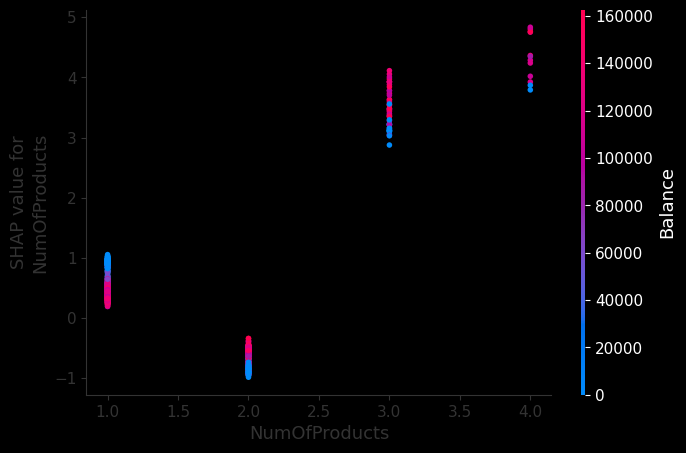

In [112]:
shap.dependence_plot("NumOfProducts", shap_values, test[X])

In [113]:
features = model.get_feature_importance(prettified=True)['Feature Id'].values

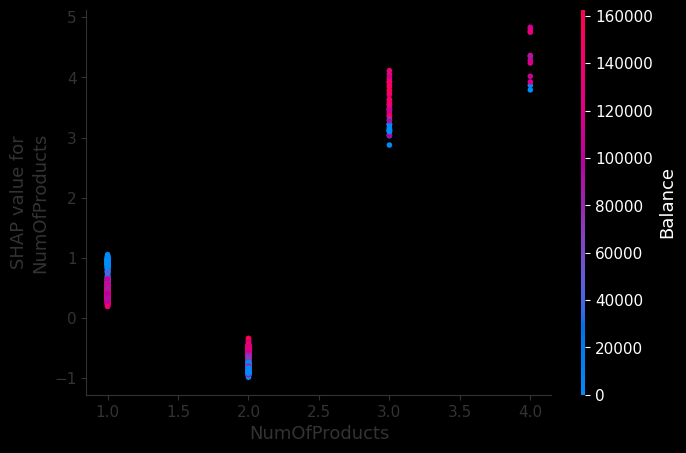

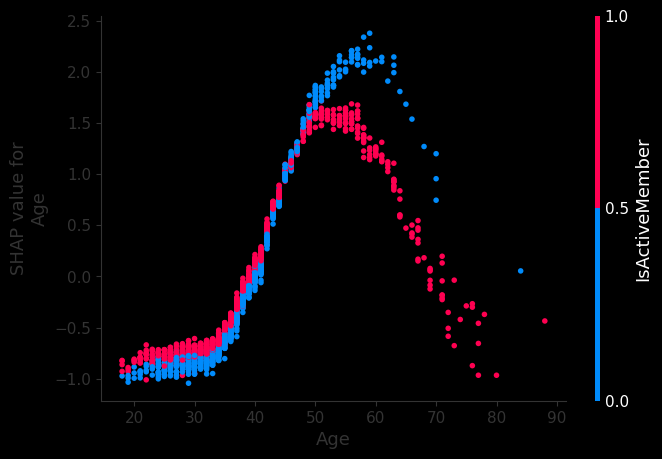

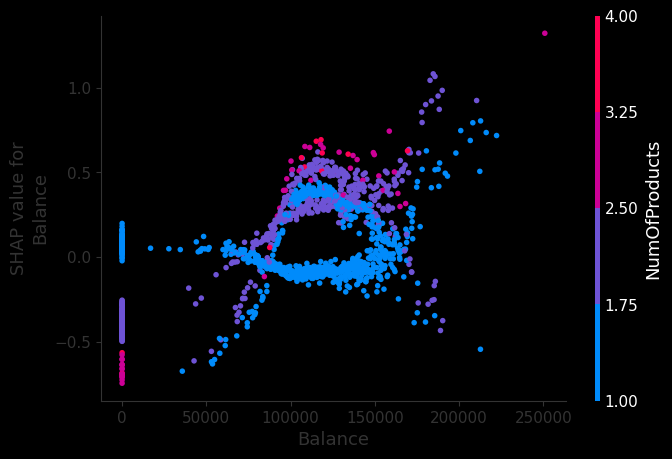

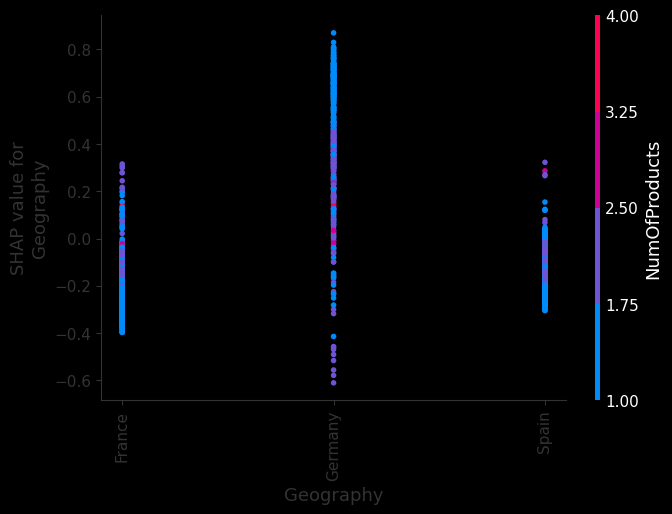

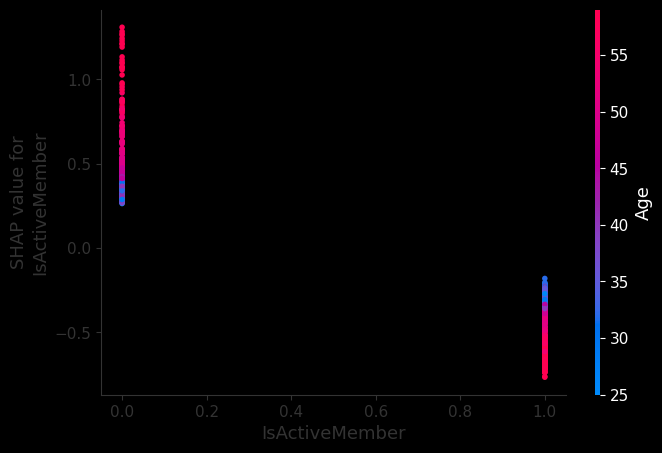

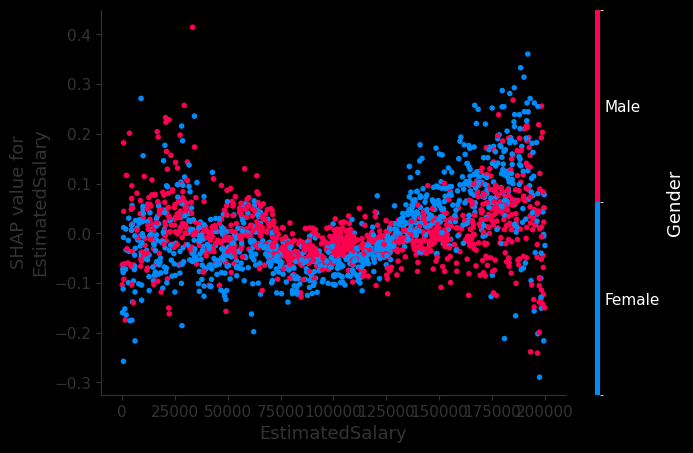

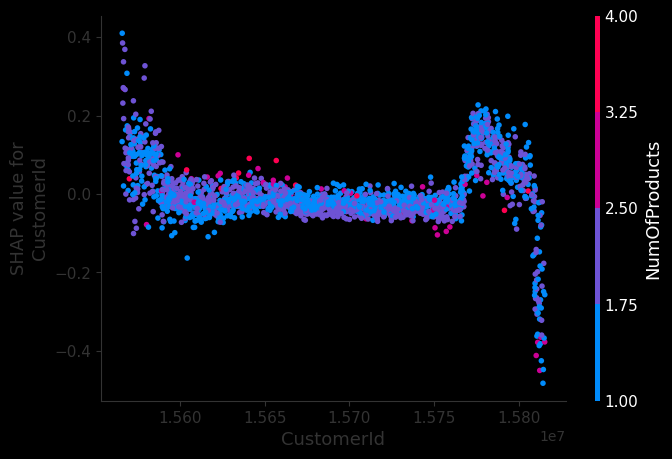

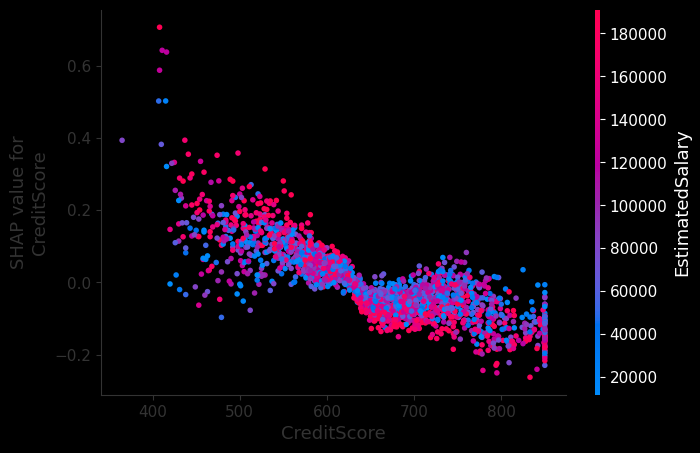

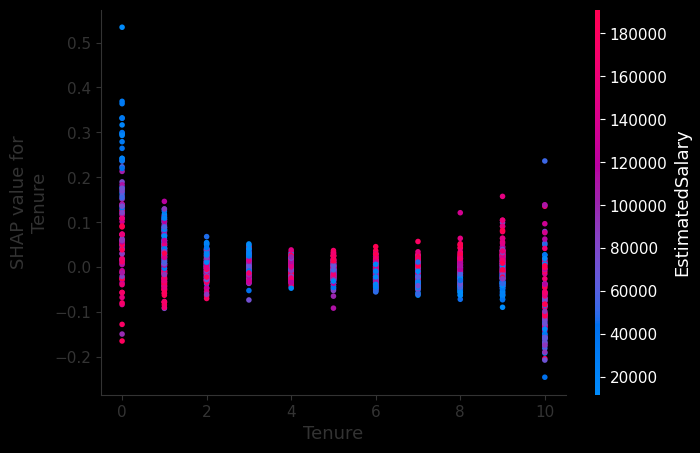

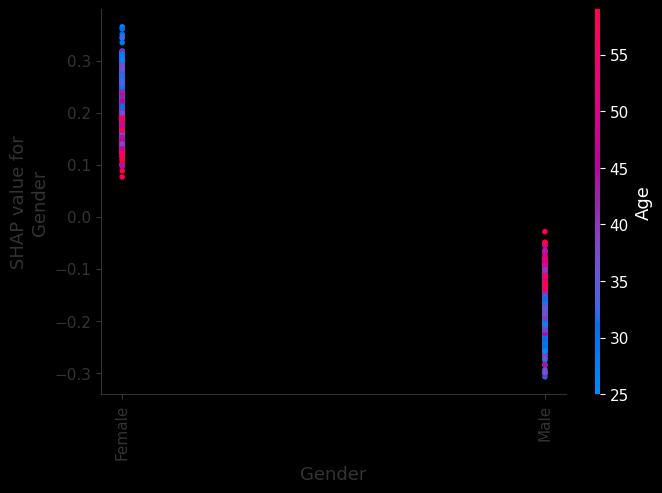

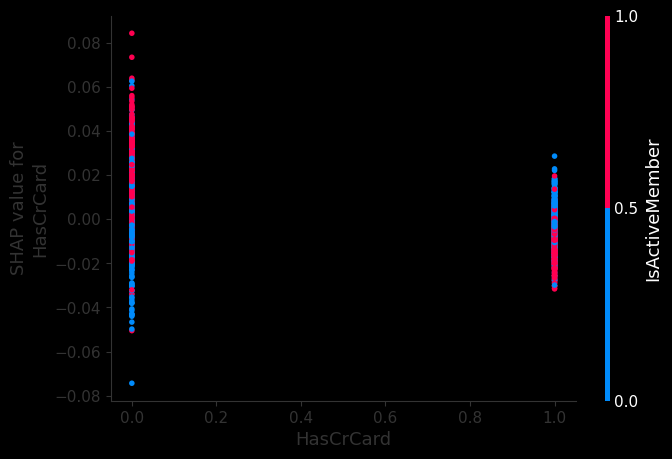

In [114]:
for feature in features:
  shap.dependence_plot(feature, shap_values, test[X])

In [115]:
model.predict(test[X], prediction_type='RawFormulaVal')

array([-1.88475323, -2.52652396, -1.47044046, ..., -1.73922605,
       -2.68750234, -2.93959577])